![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 4 - Performance Evaluation </center>
### <center> Precision, Recall, ROC, and AUC - Solution </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/04_PerformanceEvaluation/MainPrecisionRecall_Solution.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

### Exercise
1.
* Use the breast cancer dataset: `load_breast_cancer`.
* Use a linear SVM classifier.
* Use cross-validation to find the optimal value of $C$ which maximizes the AUC. 
    * Use the `cross_val_predict` with `method='decision_function'`.
    * Use 'roc_auc_score' to compute the AUC.
    
2.
* Split the data into 80% train and 20% validation.
    * You may use `sklearn.model_selection.train_test_split`
* Retrain your classifier on the train set (with the optimal hyper-parameters).
* Plot the ROC (and AUC) on the validation set.

In [2]:
from sklearn.svm      import SVC
from sklearn.metrics  import roc_curve, auc
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

In [3]:
import pandas as pd
from   sklearn.model_selection import cross_val_predict, KFold
from   sklearn.metrics         import roc_auc_score

dRes   = pd.DataFrame(columns=['C', 'AUC'])
oKFold = KFold(len(vY), shuffle=True, random_state=0)

for C in np.linspace(1e-3, 10, 25):
    vScore              = cross_val_predict(SVC(C=C, kernel='linear'), mX, vY, cv=oKFold, method='decision_function') 
    dRes.loc[len(dRes)] = [C, roc_auc_score(vY, vScore)]

dRes.sort_values(by='AUC', ascending=False)

,C,AUC
1,0.417625,0.994239
2,0.834250,0.993579
3,1.250875,0.993499
6,2.500750,0.993169
5,2.084125,0.993076
4,1.667500,0.993076
7,2.917375,0.992971
8,3.334000,0.992614
9,3.750625,0.992310
10,4.167250,0.991663


In [4]:
from sklearn.model_selection import train_test_split

mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, test_size=0.2)

In [5]:
#-- Best SVM:
oSVM = SVC(C=0.41, kernel='linear').fit(mTrainX, vTrainY)

In [6]:
vScore       = oSVM.decision_function(mTestX)
vFP, vTP, vα = roc_curve(vTestY, vScore, pos_label=1)
AUC          = auc(vFP, vTP)
AUC

0.9957418932197839

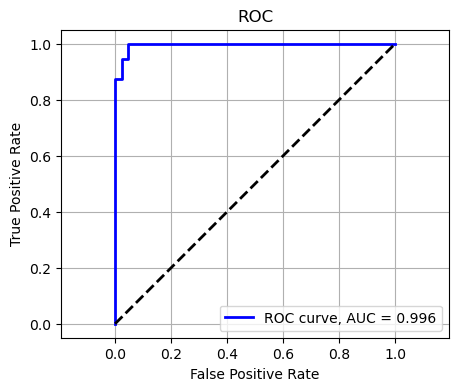

In [7]:
plt.figure(figsize=(5, 4))
plt.plot  (vFP,    vTP,    color='b', lw=2, label=f'ROC curve, AUC = {AUC:.3f}')
plt.plot  ([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ('ROC')
plt.axis  ('equal')
plt.legend()
plt.grid  ()
plt.show  ()

### Extra:
1.<br>
Use `roc_curve` and obtained the threshold $\alpha$ such that:
* Recall (true positive) = 1
* False positive is minimal

**Tip:** You can use `np.where`.

2.<br>
Implement a new predict function with the new threshold $\alpha$.
```python
def PredictWithOffset(oModel, mX, α):
```
Compute recall, precision, and $f_1$ score on the test set using `PredictWithOffset`.

In [8]:
vα

array([  8.36469056,   7.36469056,   1.48027944,   1.397377  ,
         0.83596933,   0.80559911,   0.22441572, -20.49456251])

#### Optimal $\alpha$:

In [9]:
idx = np.where(vTP == 1)[0][0]
α   = vα[idx]
α

0.22441572211161565

#### Implement the new predict function:

In [12]:
def PredictWithOffset(oModel, mX, α):
    vHatY = oModel.decision_function(mX) >= α
    
    return vHatY

#### Compute $f_1$ score:

In [13]:
from sklearn.metrics import precision_recall_fscore_support

vHatY = PredictWithOffset(oSVM, mTestX, α)
precision_recall_fscore_support(vTestY, vHatY, pos_label=1, average='binary')

(0.9726027397260274, 1.0, 0.9861111111111112, None)